In [1]:
# import libraries
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# veri setini oku
diamonds = sns.load_dataset('diamonds')

# features ve target ayrımı
X = diamonds.drop(columns=["price"])
y = diamonds["price"]

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [3]:
# CatBoost Regressor modeli tanımı
cat_reg = CatBoostRegressor(
    iterations=500,
    learning_rate=0.04,
    depth=8,
    l2_leaf_reg=4,                 # L2 regularizasyon katsayısı
    loss_function="RMSE",
    cat_features=['cut', 'color', 'clarity'],  # kategorik değişkenler
    random_state=42,
    verbose=100,
    early_stopping_rounds=50
)

0:	learn: 3850.2675396	test: 3879.3269118	best: 3879.3269118 (0)	total: 146ms	remaining: 1m 13s
100:	learn: 631.1600739	test: 632.8907383	best: 632.8907383 (100)	total: 4.04s	remaining: 16s
200:	learn: 554.4916543	test: 564.9842392	best: 564.9842392 (200)	total: 7.85s	remaining: 11.7s
300:	learn: 530.8062714	test: 549.6312606	best: 549.6312606 (300)	total: 11.9s	remaining: 7.89s
400:	learn: 517.4887759	test: 543.7174012	best: 543.7174012 (400)	total: 15.7s	remaining: 3.87s
499:	learn: 506.2022577	test: 539.1994277	best: 539.1994277 (499)	total: 19.3s	remaining: 0us

bestTest = 539.1994277
bestIteration = 499

RMSE: 539.1994277475607
R²: 0.9819938476350271


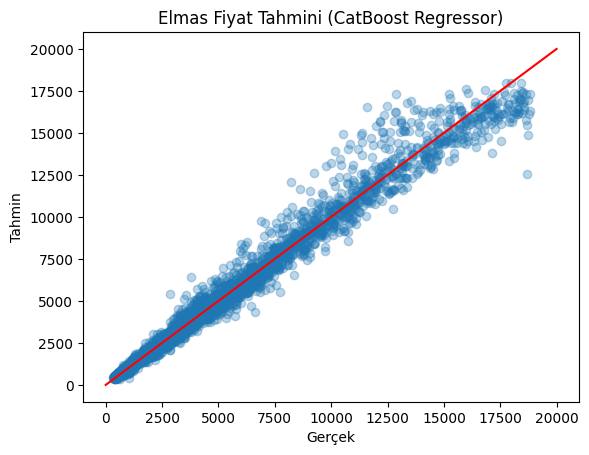

In [4]:
# model eğitimi
cat_reg.fit(X_train, y_train, eval_set=(X_test, y_test))

# tahmin
y_pred = cat_reg.predict(X_test)

# değerlendirme
rmse = mean_squared_error(y_test, y_pred) ** 0.5  # squared=False yerine karekök
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")

# tahmin - gerçek karşılaştırması (scatter plot)
plt.figure()
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([0, 20000], [0, 20000], color="red")  # referans doğrusu
plt.xlabel("Gerçek")
plt.ylabel("Tahmin")
plt.title("Elmas Fiyat Tahmini (CatBoost Regressor)")
plt.show()
